# How many crimes might be in the future Poland?

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data definition](#definition)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal diagram for future crimes in Poland. Specifically, this report will be targeted to stakeholders interested in opening their business in Poland to show them the safest subdivision in Poland 

We will use our data science powers to generate a few predictive values of future crime data. 

## Data definition <a name="definition"></a>

the whole dataset is based on open dataset from polish goverment since 1999 to 2019.
In this scenario I would like to predict the future number of crimes. Group them by crime numbers. I will create folium map of Poland. To do that I use forsquare to find a right location of provinces.


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt 
import pylab as pl
%matplotlib inline
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
!conda install -c anaconda xlrd --yes
print('Folium installed')
print('Libraries imported.')



Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates     anaconda::ca-certificates-2020.7.22-0 --> conda-forge::ca-certificates-2020.6.20-hecda079_0
  certifi                anaconda::certifi-2020.6.20-py36_0 --> conda-forge::certifi-2020.6.20-py36h9f0ad1d_0
  openssl               anaconda::openssl-1.1.1h-h7b6447c_0 --> conda-forge::openssl-1.1.1h-h516909a_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - xlrd


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2020.6.2~ --> anaconda::ca-certificates-2020.7.22-0

The fol

### The whole dataset is based on open dataset from polish goverment since 1999 to 2019. In this scenario I would like to predict the future numer of crimes and create folium map of Poland 


## Analysis <a name="analysis"></a>


In [2]:
poland = pd.read_excel("crimes_generally.xls")

In [3]:
poland.head()


,Area,Year,detected_crimes,crimes_committed,%_of_detection
0,Polska,2019,796557,586030,73.1
1,Polska,2018,768049,567775,73.4
2,Polska,2017,753963,545008,71.7
3,Polska,2016,748459,501877,66.5
4,Polska,2015,799779,524380,64.7


In [4]:
subdivisions=pd.read_excel("crimes_woj.xls")

In [5]:
poland.head()

,Area,Year,detected_crimes,crimes_committed,%_of_detection
0,Polska,2019,796557,586030,73.1
1,Polska,2018,768049,567775,73.4
2,Polska,2017,753963,545008,71.7
3,Polska,2016,748459,501877,66.5
4,Polska,2015,799779,524380,64.7


In [6]:
subdivisions.head()

,Area,Year,detected crimes,crimes committed,% of detection
0,woj. dolnośląskie,2019,77609,51894,66.3
1,woj. dolnośląskie,2018,74726,49227,65.4
2,woj. dolnośląskie,2017,72858,47151,64.1
3,woj. dolnośląskie,2016,74705,45853,60.7
4,woj. dolnośląskie,2015,79395,48634,60.3


# Data cleaning & organizing

### Shape before cleaning

In [7]:
print("subdivisions",subdivisions.shape)
print("Poland",poland.shape)


subdivisions (378, 5)
Poland (21, 5)


## Making years descending because that will look better on diagram

In [8]:
poland = poland.sort_values(by=['Year'], ascending=True)

# Clean unneccessary data

In [9]:
indexNames = subdivisions[(subdivisions['Area'] == 'teren działania KSP Warszawa')].index
 
subdivisions.drop(indexNames , inplace=True)

In [10]:
indexNames = subdivisions[(subdivisions['Area'] == 'teren działania KWP z/s w Radomiu')].index
 
subdivisions.drop(indexNames , inplace=True)

### Shape after cleaning

In [11]:
print("subdivisions",subdivisions.shape)
print("Poland",poland.shape)

subdivisions (336, 5)
Poland (21, 5)


# Data visualization

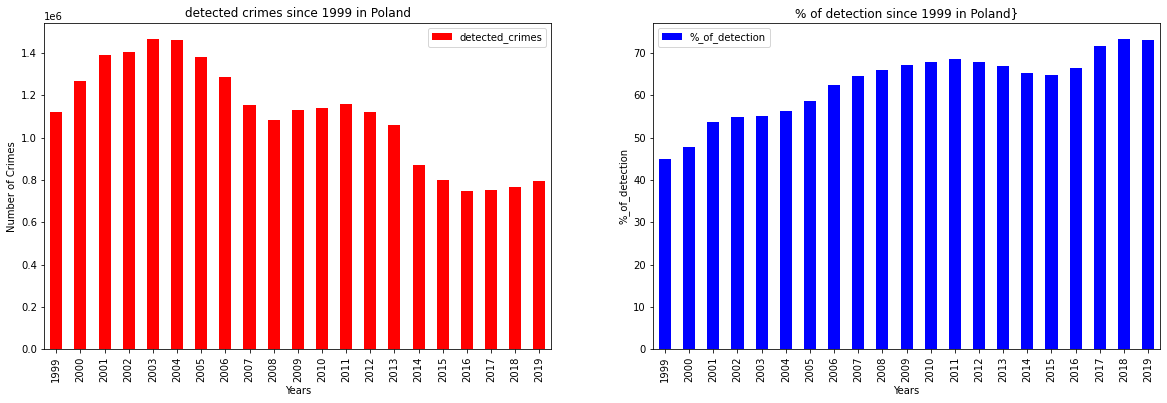

In [12]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
poland[['detected_crimes','Year']].set_index('Year').plot(kind='bar', color='red', figsize=(20, 6), ax=ax0) 
ax0.set_title('detected crimes since 1999 in Poland')
ax0.set_xlabel('Years')
ax0.set_ylabel('Number of Crimes')

# Subplot 2: Line plot
poland[['%_of_detection','Year']].set_index('Year').plot(kind='bar', color='blue' ,figsize=(20, 6), ax=ax1) 
ax1.set_title ('% of detection since 1999 in Poland}')
ax1.set_ylabel('%_of_detection')
ax1.set_xlabel('Years')

plt.show()

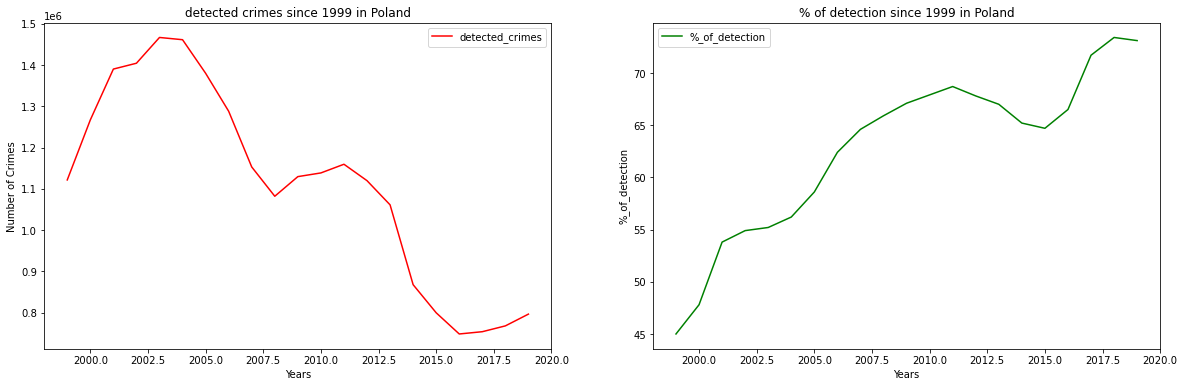

In [13]:
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
poland[['detected_crimes','Year']].set_index('Year').plot( color='red', figsize=(20, 6), ax=ax0) 
ax0.set_title('detected crimes since 1999 in Poland')
ax0.set_xlabel('Years')
ax0.set_ylabel('Number of Crimes')

# Subplot 2: Line plot
poland[['%_of_detection','Year']].set_index('Year').plot( color='green' ,figsize=(20, 6), ax=ax1) 
ax1.set_title ('% of detection since 1999 in Poland')
ax1.set_ylabel('%_of_detection')
ax1.set_xlabel('Years')

plt.show()

## As we can see in 2019 there is less crimes and better accuracy with detecting it than in 1999 that's a great news

# Creating map of Poland using Folium library

In [14]:
subdivisions.head()

,Area,Year,detected crimes,crimes committed,% of detection
0,woj. dolnośląskie,2019,77609,51894,66.3
1,woj. dolnośląskie,2018,74726,49227,65.4
2,woj. dolnośląskie,2017,72858,47151,64.1
3,woj. dolnośląskie,2016,74705,45853,60.7
4,woj. dolnośląskie,2015,79395,48634,60.3


In [15]:
map_sub = subdivisions.groupby(["Area"]).mean()

In [16]:
map_sub.drop(["Year"],axis=1,inplace=True)

In [17]:
map_sub.rename(index = {"woj. mazowieckie (KWP z/s w Radomiu i KSP Warszawa)": "woj. mazowieckie"}, 
                                 inplace = True) 

In [18]:
map_sub.reset_index()

,Area,detected crimes,crimes committed,% of detection
0,woj. dolnośląskie,105014.857143,67217.285714,63.233333
1,woj. kujawsko-pomorskie,59279.666667,38099.095238,64.980952
2,woj. lubelskie,48816.095238,34245.238095,70.285714
3,woj. lubuskie,35987.000000,25605.857143,70.771429
4,woj. mazowieckie,153906.571429,80284.714286,53.209524
5,woj. małopolskie,92882.047619,56521.428571,61.409524
6,woj. opolskie,28628.714286,19835.714286,68.709524
7,woj. podkarpackie,36560.523810,26307.380952,71.861905
8,woj. podlaskie,25959.857143,17452.714286,67.400000
9,woj. pomorskie,78101.285714,46623.904762,60.347619


# Using forsquare API we will get location of Poland 

In [19]:
CLIENT_ID = 'Z5UKKALOPNB11YDPWDUYPLUYSP5U3D0S5SRDZO1STAES0L1P'
CLIENT_SECRET = '4FCHGBIX3JFBY4UH1NDGXJFDQWYPFDNHDKTG1IDOSDD5YODM' 
VERSION = '20180604'
LIMIT = 30


In [20]:
address = 'Poland'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

52.215933 19.134422


# Uplading json file which contain coordinates where excacly  subdivisions are

In [21]:
polish_geo = r'polish.geojson'

In [22]:
polish_map = folium.Map(location=[latitude,longitude], zoom_start=6)
polish_map.choropleth(
    geo_data=polish_geo,
    data=subdivisions,
    columns=['Area', 'detected crimes'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Avg detected crimes in Poland since 1999'
)

# display map
polish_map

In [23]:
the_safest_subdivision = map_sub[['detected crimes']].sort_values(by=['Area'],ascending=False).head(1)
the_safest_subdivision.reset_index()

,Area,detected crimes
0,woj. świętokrzyskie,32262.857143


## The conclusion of this diagram is clear, woj. świętokrzyskie is the safest subdivision in Poland

#  Multiple Linear Regression to predict future numbers of crimes in Poland 

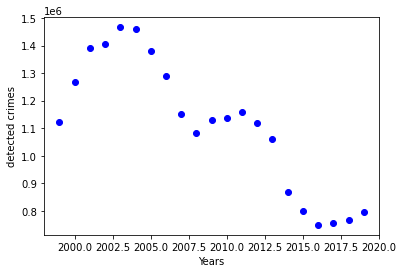

In [24]:
msk = np.random.rand(len(poland)) < 0.8
train = poland[msk]
test = poland[~msk]
plt.scatter(poland.Year, poland.detected_crimes,  color='blue')
plt.ylabel("detected crimes")
plt.xlabel("Years")
plt.show()

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['crimes_committed','detected_crimes']])
y = np.asanyarray(train[['Year']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 3.85834540e-05 -3.69952356e-05]]


In [26]:
y_hat= regr.predict(test[['crimes_committed','detected_crimes']])
x = np.asanyarray(test[['crimes_committed','detected_crimes']])
y = np.asanyarray(test[['Year']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
regr.fit (x, y)
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2.82
Variance score: 0.89


## Great variance score now we can predict the future number of crimes

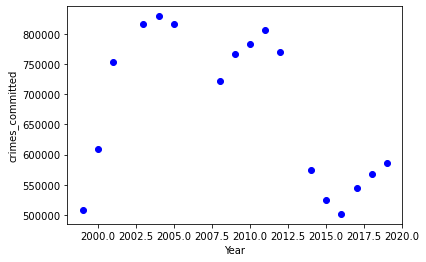

In [27]:
plt.scatter(train.Year, train.crimes_committed,  color='blue')
plt.xlabel("Year")
plt.ylabel("crimes_committed")
plt.show()

## Results and Discussion <a name="results"></a>

Analysis shows that  there are pockets of low subdivisions. Highest concentration of crimes was detected on woj.mazowieckie. Another borough was identified as potentially interesting by having a low crimes was woj. świętokrzyskie

After directing our attention to this 16 subdivisions at the map we can see which subdivision is the best to live or to lead a safe business.

Those location candidates were in json file which gain my project more response
Result of all this is 16 zones containing largest number of potential new crime locations  Purpose of this analysis was to only provide info on areas close to Poland.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify the future crime values and to show you the small-risk subdivision areas. These diagrams show us that the Poland should hire more police officers. that project shows there is also a good sign for poland, because this country is safer from criminals than in 90s.
